### 1.  Load the dataset

In [78]:
 
import pandas as pd
df = pd.read_csv("Pokemon 2.csv")
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


### 2 Features selection
We will only use 6 columns to determine the speed based on other 5 columns.


In [79]:


data = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
data

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,80,100,123,122,120,80
4,39,52,43,60,50,65
...,...,...,...,...,...,...
795,50,100,150,100,150,50
796,50,160,110,160,110,110
797,80,110,60,150,130,70
798,80,160,60,170,130,80


In [ ]:
#Checking null values
data.isnull().sum(0)

HP         0
Attack     0
Defense    0
Sp. Atk    0
Sp. Def    0
Speed      0
dtype: int64

### 3 Split the dataset into train, validation and test dataset

In [80]:

sample = data.sample(frac = 1)
sample.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
661,60,80,95,70,85,50
645,71,95,85,110,95,79
73,80,100,70,50,60,45
394,95,23,48,23,48,23
477,60,60,60,105,105,105


In [ ]:

train = sample[:500]
val = sample[500:650]
test = sample[650:800]
len(train), len(test), len(val)

(500, 150, 150)

In [ ]:
train_X, train_Y = train.to_numpy()[:,0:-1], train.to_numpy()[:,-1]
val_X, val_Y = val.to_numpy()[:,0:-1], val.to_numpy()[:,-1]
test_X, test_Y = test.to_numpy()[:,0:-1], test.to_numpy()[:,-1]
(train_X.shape, train_Y.shape), (val_X.shape, val_Y.shape), (test_X.shape, test_Y.shape)

(((500, 5), (500,)), ((150, 5), (150,)), ((150, 5), (150,)))

### 4.Preprocess The Inputs
Import minmaxscaler for normalization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a752d08e0>,
      dtype=object)

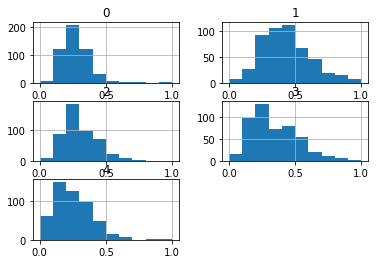

In [81]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_X_scaled, val_X_scaled, test_X_scaled = scaler.fit_transform(train_X), scaler.fit_transform(val_X), scaler.fit_transform(test_X)
pd.DataFrame(train_X_scaled).hist()

## 5 Model buildings
1.   mean absolute error (MAE) is a measure of errors between paired observations 
expressing the same phenomenon. 











In [58]:

from sklearn.metrics import mean_absolute_error
average_speed = train_Y.mean()
mean_absolute_error(val_Y, [average_speed]*len(val_Y))
#On average we will be off by 24 points. We would always like to improve our model than the average mean_absolute error.


23.765280000000004

In [62]:
#Building linear regression model
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression().fit(train_X, train_Y)
mean_absolute_error(val_Y, linear_model.predict(val_X))


19.205762630895947

In [63]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor().fit(train_X, train_Y)

mean_absolute_error (val_Y, random_forest.predict(val_X))



18.468458571428574

In [71]:
#Building neural networks
#Inputs layes has 5 inputs, dense layer is 1
#100 epoch means training the neural network with the training data upto 100 cycles.
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import Adam

model1 = Sequential([layers.Input((5,)),
                      layers.Dense(1)])
model1.compile(loss='mse', optimizer=Adam(learning_rate=0.01), metrics=['mean_absolute_error'])

model1.fit(x=train_X, y=train_Y, validation_data=(val_X, val_Y), epochs=100)

Epoch 1/100
16/16 [==============================] - 1s 13ms/step - loss: 14409.0332 - mean_absolute_error: 109.7225 - val_loss: 7692.1748 - val_mean_absolute_error: 79.7019
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 5168.9297 - mean_absolute_error: 60.3636 - val_loss: 2618.0500 - val_mean_absolute_error: 41.8429
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 2288.8516 - mean_absolute_error: 36.7822 - val_loss: 1533.6110 - val_mean_absolute_error: 28.5347
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 1956.7078 - mean_absolute_error: 32.8720 - val_loss: 1444.9280 - val_mean_absolute_error: 27.3533
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 1910.1865 - mean_absolute_error: 32.5556 - val_loss: 1413.0055 - val_mean_absolute_error: 27.2042
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 1829.9653 - mean_absolute_error: 32.0397 - val_loss: 1389.2644 - val_

In [72]:
model1.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 1)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [73]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import Adam

model2 = Sequential([layers.Input((5,)),
                     layers.Dense(32),
                     layers.Dense(32),
                     layers.Dense(1)])
model2.compile(loss='mse', optimizer=Adam(learning_rate=0.01), metrics=['mean_absolute_error'])

model2.fit(x=train_X, y=train_Y, validation_data=(val_X, val_Y), epochs=100)

Epoch 1/100
16/16 [==============================] - 1s 15ms/step - loss: 2018.5615 - mean_absolute_error: 35.1422 - val_loss: 1359.1338 - val_mean_absolute_error: 30.2102
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 864.4623 - mean_absolute_error: 23.0643 - val_loss: 767.5418 - val_mean_absolute_error: 21.4698
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 719.5769 - mean_absolute_error: 20.9406 - val_loss: 742.0668 - val_mean_absolute_error: 21.0871
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 671.1666 - mean_absolute_error: 20.3083 - val_loss: 684.0820 - val_mean_absolute_error: 21.1401
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 664.7755 - mean_absolute_error: 19.9087 - val_loss: 674.6601 - val_mean_absolute_error: 20.6565
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 655.3932 - mean_absolute_error: 19.8094 - val_loss: 669.4131 - val_mean_absolut

In [74]:
model2.summary()


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 32)                192       
                                                                 
 dense_19 (Dense)            (None, 32)                1056      
                                                                 
 dense_20 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


## 6. Choosing the best model
Since there is no different between linear and decision tree regression model, we will go for linear model as it is easy to train.
Using linear model to predict the test data set.

In [83]:

mean_absolute_error(test_Y, linear_model.predict(test_X))

20.28271415824527